In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import wrangle

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [2]:
df = wrangle.get_explore_data()

In [3]:
df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [4]:
df = wrangle.prep_data(df, features = wrangle.features)

In [5]:
df.head()

,climateregions__climateregion,elevation__elevation,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,contest-precip-14d__precip,contest-pres-sfc-gauss-14d__pres,contest-prwtr-eatm-14d__prwtr,contest-rhum-sig995-14d__rhum,contest-slp-14d__slp,contest-tmp2m-14d__tmp2m,contest-wind-h10-14d__wind-hgt-10,contest-wind-h100-14d__wind-hgt-100,contest-wind-h500-14d__wind-hgt-500,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-250-14d__wind-uwnd-250,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-wind-vwnd-925-14d__wind-vwnd-925
0,BSh,200.0,0.0,0.833333,2014-09-01,237.00,94.31,98644.97,42.45,81.72,101352.08,28.744480,31246.63,16666.81,5899.66,1535.52,-2.56,-5.22,-3.52,4.41
1,BSh,200.0,0.0,0.833333,2014-09-02,228.90,100.85,98686.80,42.66,82.56,101396.02,28.370585,31244.78,16667.31,5901.03,1538.00,-2.39,-5.20,-4.49,3.74
2,BSh,200.0,0.0,0.833333,2014-09-03,220.69,101.25,98712.85,43.23,83.29,101429.25,28.133059,31239.27,16668.39,5902.18,1540.32,-2.76,-5.00,-5.44,3.40
3,BSh,200.0,0.0,0.833333,2014-09-04,225.28,101.90,98711.70,43.11,83.26,101440.85,28.256798,31232.86,16667.39,5903.07,1541.10,-3.00,-4.61,-5.76,3.29
4,BSh,200.0,0.0,0.833333,2014-09-05,237.24,82.95,98686.46,42.98,82.50,101419.53,28.372353,31226.16,16665.65,5903.36,1539.73,-3.40,-4.25,-6.09,3.27


In [6]:
df = wrangle.rename_data(df)

In [7]:
df.head()

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,sea_level_press,mean_temp,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb
0,BSh,200.0,0.0,0.833333,2014-09-01,237.00,94.31,98644.97,42.45,81.72,101352.08,28.744480,31246.63,16666.81,5899.66,1535.52,-2.56,-5.22,-3.52,4.41
1,BSh,200.0,0.0,0.833333,2014-09-02,228.90,100.85,98686.80,42.66,82.56,101396.02,28.370585,31244.78,16667.31,5901.03,1538.00,-2.39,-5.20,-4.49,3.74
2,BSh,200.0,0.0,0.833333,2014-09-03,220.69,101.25,98712.85,43.23,83.29,101429.25,28.133059,31239.27,16668.39,5902.18,1540.32,-2.76,-5.00,-5.44,3.40
3,BSh,200.0,0.0,0.833333,2014-09-04,225.28,101.90,98711.70,43.11,83.26,101440.85,28.256798,31232.86,16667.39,5903.07,1541.10,-3.00,-4.61,-5.76,3.29
4,BSh,200.0,0.0,0.833333,2014-09-05,237.24,82.95,98686.46,42.98,82.50,101419.53,28.372353,31226.16,16665.65,5903.36,1539.73,-3.40,-4.25,-6.09,3.27


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   region               375734 non-null  object        
 1   elevation            375734 non-null  float64       
 2   lat                  375734 non-null  float64       
 3   lon                  375734 non-null  float64       
 4   startdate            375734 non-null  datetime64[ns]
 5   potential_evap       375734 non-null  float64       
 6   precip               375734 non-null  float64       
 7   barometric_pressure  375734 non-null  float64       
 8   all_atmos_precip     375734 non-null  float64       
 9   relative_humidity    375734 non-null  float64       
 10  sea_level_press      375734 non-null  float64       
 11  mean_temp            375734 non-null  float64       
 12  height_10_mb         375734 non-null  float64       
 13  height_100_mb 

In [24]:
df.shape

(375734, 20)

### how is the mean calculated? where does the 3939 come from ? does that mean another nmme column has 3939 uniuqe values?

In [ ]:
df.nmme0mean.nunique()

In [ ]:
df['nmme-tmp2m-34w__cancm4'].nunique()

#### end of nmme nununique rabbit chase for now

In [ ]:
df.describe().T

In [ ]:
df.shape

### group by latitude to deternime how many locations.

In [ ]:
df_lat = df.groupby('lat')

In [ ]:
df_lat.lon.value_counts()

<div class="alert alert-block alert-success">
<b>Finding:</b>  375734 obervations with 731 per location means there are 514 locations use green boxes for 
related links from each section of a notebook.
</div>

In [ ]:
df_lat.head()

In [ ]:
df.lon.value_counts()


### looking at regions

In [13]:
regions = pd.DataFrame(df.groupby('region'))

In [14]:
regions.head()

,0,1
0,BSh,region elevation lat lon s...
1,BSk,region elevation lat lon ...
2,BWh,region elevation lat lon s...
3,BWk,region elevation lat lon ...
4,Cfa,region elevation lat lon ...


In [16]:
regions.shape

(15, 2)

In [17]:
regions

,0,1
0,BSh,region elevation lat lon s...
1,BSk,region elevation lat lon ...
2,BWh,region elevation lat lon s...
3,BWk,region elevation lat lon ...
4,Cfa,region elevation lat lon ...
5,Cfb,region elevation lat lon ...
6,Csa,region elevation lat lon ...
7,Csb,region elevation lat lon ...
8,Dfa,region elevation lat lon ...
9,Dfb,region elevation lat lon ...


In [19]:
df.region.value_counts()

BSk    139621
Dfb     52632
Cfa     51901
Csb     40936
Dfa     22661
BWk     13889
Dfc     12427
BWh      9503
Csa      9503
Dsb      8041
BSh      5117
Cfb      4386
Dsc      2924
Dwa      1462
Dwb       731
Name: region, dtype: int64

<AxesSubplot:>

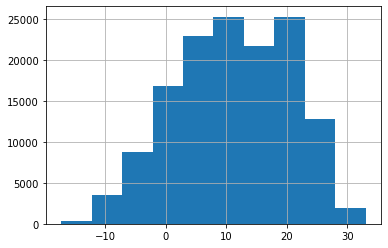

In [25]:
df[df.region=='BSk'].mean_temp.hist()

In [ ]:
for x in region